### Web Scraping for Patent Claims Extraction

In [1]:
# Importing the required libraries.

import requests
import bs4
import pandas as pd

In [2]:
# Rolls-Royce Fuel Cell Patents.

patents = ['US5486428A', 'US8124289B2', 'US7473482B2', 'US7317261B2', 'US5554454A']

In [3]:
# Generating the patent URLs.

text= ""
for patnum in patents:
    text = patnum
    url = 'https://patents.google.com/patent/' + text
    print(url)

https://patents.google.com/patent/US5486428A
https://patents.google.com/patent/US8124289B2
https://patents.google.com/patent/US7473482B2
https://patents.google.com/patent/US7317261B2
https://patents.google.com/patent/US5554454A


In [4]:
# Web Scraping to obtain HTML tag class claims for each URL.

text= ""
claims = []
for patnum in patents:
    text = patnum
    url = 'https://patents.google.com/patent/' + text
    request_result = requests.get( url )
    soup = bs4.BeautifulSoup(request_result.text, "html.parser")
    temp = soup.find( "div" , class_='claims' ).text
    claims.append(temp)
    print(temp)


We claim:
 
1. A solid oxide fuel cell stack comprisinga plurality of solid oxide electrolyte members, each solid oxide electrolyte member having a first surface and a second oppositely facing surface, an anode electrode on the first surface of each solid oxide electrolyte member and a cathode electrode on the second opposite surface of each solid oxide electrolyte member to form a fuel cell, each anode electrode partially defining an anode chamber, each cathode electrode partially defining a cathode chamber, means to define passages internally of the solid oxide fuel cell stack, the passages supplying hydrogen to the anode chambers, the passages containing a catalyst suitable for steam reforming hydrocarbon fuel to hydrogen and other product gases, the means to define the passages being in intimate thermal contact with the solid oxide fuel cells such that waste heat from the oxide fuel cells provides the endothermic heat requirements for the steam reforming reaction, an adiabatic pre


What is claimed is:
 
1. A multistage combustor configured for starting a fuel cell system, said fuel cell system including a first component and a second component, comprising:
a partial oxidation (POX) burner having an inlet for receiving a flow of a fuel/oxidant mixture, said POX burner being configured to partially oxidize a fuel in said fuel/oxidant mixture to yield a partially oxidized gas;
a first output coupled to said fuel cell system and configured to provide a first amount of said partially oxidized gas as a first output gas from said multistage combustor to said first component;
a second burner coupled to said POX burner, said second burner being configured to receive a second amount of said partially oxidized gas from said POX burner and to oxidize at least some of a remaining fuel in said second amount of said partially oxidized gas to yield a second output gas from said multistage combustor different from said first output gas; and
a second output coupled to said second


 
1. Power generating apparatus, the apparatus comprising a power generating assembly including a plurality of power units each including a wind power turbine, the units being attached sequentially to a cable, with one end of the cable being mountable to the ground with the cable extending upwardly therefrom such that the power units are located above the ground and can be driven by the wind.

  
2. Apparatus according to claim 1, characterised in that each assembly includes greater than 20 power units.

  
3. Apparatus according to claim 2, characterised in that each assembly includes greater than 50 power units.

  
4. Apparatus according to claim 3, characterised in that each assembly includes greater than 100 power units.

  
5. Apparatus according to claim 1, characterised in that the cable is greater than 1,000 m long.

  
6. Apparatus according to claim 5, characterised in that the cable is greater than 5,000 m long.

  
7. Apparatus according to claim 1, characterised in that 


We claim:
 
1. A solid oxide fuel cell stack comprising at least one first module and at least one second module,each first module comprising a first hollow distribution member defining a plurality of first passages internally thereof for the supply of a first reactant longitudinally relative to the first distribution member, the first distribution member having sides facing in opposite directions, at least one electrolyte/electrode assembly arranged to be carried on one side of the first distribution member, the at least one electrolyte/electrode assembly and the first distribution member defining a plurality of second passages therebetween, the second passages extending longitudinally relative to the first distribution member for the distribution of first reactant and the removal of spent first reactant, each electrolyte/electrode assembly comprising a plurality of first electrodes, a plurality of solid oxide electrolyte members and a plurality of second electrodes, each solid oxide

In [5]:
len(patents)

5

In [6]:
len(claims)

5

In [7]:
# Constructing a DataFrame having Patent Numbers and their respective extracted Patent Claims.

patdict = {'patnum':patents,'claims':claims}
patent_df = pd.DataFrame(patdict)
patent_df

,patnum,claims
0,US5486428A,\nWe claim:\n \n1. A solid oxide fuel cell sta...
1,US8124289B2,\nWhat is claimed is:\n \n1. A multistage comb...
2,US7473482B2,\n \n1. A solid oxide fuel cell module compris...
3,US7317261B2,"\n \n1. Power generating apparatus, the appara..."
4,US5554454A,\nWe claim:\n \n1. A solid oxide fuel cell sta...


### Text Cleaning of Extracted Patent Claims

In [8]:
# Importing the required libraries.

import pandas as pd
import re
import spacy
nlp = spacy.load("en_core_web_sm")

In [9]:
# Creating a list of the raw patent claims.

patent_claims = patent_df
claims_list = patent_claims['claims'].tolist()
claims_list

['\nWe claim:\n \n1. A solid oxide fuel cell stack comprisinga plurality of solid oxide electrolyte members, each solid oxide electrolyte member having a first surface and a second oppositely facing surface, an anode electrode on the first surface of each solid oxide electrolyte member and a cathode electrode on the second opposite surface of each solid oxide electrolyte member to form a fuel cell, each anode electrode partially defining an anode chamber, each cathode electrode partially defining a cathode chamber, means to define passages internally of the solid oxide fuel cell stack, the passages supplying hydrogen to the anode chambers, the passages containing a catalyst suitable for steam reforming hydrocarbon fuel to hydrogen and other product gases, the means to define the passages being in intimate thermal contact with the solid oxide fuel cells such that waste heat from the oxide fuel cells provides the endothermic heat requirements for the steam reforming reaction, an adiabati

In [10]:
# Removing the HTML new line tag and digits.

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('\n|\d+', '', claims))
claims_list = temp_claims_list

In [11]:
# Removing commonly occurring phrases that do not contribute to the Knowledge Graph.

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('What is claimed is: |The invention claimed is: |We claim: |of claim |in claim |to claim', '', claims))
claims_list = temp_claims_list

In [12]:
# Fixing some commonly occurring phrases.

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub(', wherein|,wherein', 'wherein', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('wherein', '', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub(', further', 'further', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('anda', 'and a', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('comprisinga', 'comprising a', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('.  .', '.', claims))
claims_list = temp_claims_list

In [13]:
# Splitting the sentences at full-stop and semi-colon.

temp_claims_list = []
for claims in claims_list:
  temp_claims_list.append(re.split(r'\.|\;', claims)) 
claims_list = temp_claims_list

In [14]:
# Removing empty strings.

temp_claims_list = []
for i in claims_list:
  for j in i:
    if j != '':
      temp_claims_list.append(j)
claims_list = temp_claims_list

In [15]:
# Obtained list of claims from all patents.

claims_list

[' A solid oxide fuel cell stack comprising a plurality of solid oxide electrolyte members, each solid oxide electrolyte member having a first surface and a second oppositely facing surface, an anode electrode on the first surface of each solid oxide electrolyte member and a cathode electrode on the second opposite surface of each solid oxide electrolyte member to form a fuel cell, each anode electrode partially defining an anode chamber, each cathode electrode partially defining a cathode chamber, means to define passages internally of the solid oxide fuel cell stack, the passages supplying hydrogen to the anode chambers, the passages containing a catalyst suitable for steam reforming hydrocarbon fuel to hydrogen and other product gases, the means to define the passages being in intimate thermal contact with the solid oxide fuel cells such that waste heat from the oxide fuel cells provides the endothermic heat requirements for the steam reforming reaction, an adiabatic prereformer to 

### Extraction of Phrases from Complex Claims

In [ ]:
# The code is sourced from: https://github.com/flairNLP.

In [16]:
# Importing the required libraries.


from flair.data import Sentence
from flair.models import SequenceTagger

In [17]:
# Sequence Tagging for meaningful phrases.

ent_tags = []
ent_texts = []

tagger = SequenceTagger.load("flair/chunk-english")
for claim in claims_list:
  sentence = Sentence(claim)
  tagger.predict(sentence)
  for entity in sentence.get_spans('np'):
    ent_tags.append(entity.tag)
    ent_texts.append(entity.text)

C:\Users\Madhu\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:588: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


2022-10-16 13:50:52,998 loading file C:\Users\Madhu\.flair\models\chunk-english\5b53097d6763734ee8ace8de92db67a1ee2528d5df9c6d20ec8e3e6f6470b423.d81b7fd7a38422f2dbf40f6449b1c63d5ae5b959863aa0c2c1ce9116902e8b22
2022-10-16 13:50:54,036 SequenceTagger predicts: Dictionary with 45 tags: <unk>, O, B-NP, E-NP, I-NP, S-PP, S-VP, S-SBAR, S-ADVP, S-NP, S-ADJP, B-VP, E-VP, B-PP, E-PP, I-VP, S-PRT, B-ADVP, E-ADVP, B-ADJP, E-ADJP, B-CONJP, I-CONJP, E-CONJP, I-ADJP, B-SBAR, E-SBAR, S-INTJ, I-ADVP, I-PP, B-UCP, I-UCP, E-UCP, S-LST, B-PRT, I-PRT, E-PRT, S-CONJP, B-INTJ, E-INTJ, I-INTJ, B-LST, E-LST, <START>, <STOP>


In [18]:
# Dictionary of entities and their sequence tags.

def test(keys, values):
  return dict(zip(keys, values))

ent_dict =  test(ent_texts, ent_tags)
print(ent_dict)

{'A solid oxide fuel cell stack': 'NP', 'comprising': 'VP', 'a plurality': 'NP', 'of': 'PP', 'solid oxide electrolyte members': 'NP', 'each solid oxide electrolyte member': 'NP', 'having': 'VP', 'a first surface': 'NP', 'a second oppositely facing surface': 'NP', 'an anode electrode': 'NP', 'on': 'PP', 'the first surface': 'NP', 'a cathode electrode': 'NP', 'the second opposite surface': 'NP', 'to form': 'VP', 'a fuel cell': 'NP', 'each anode electrode': 'NP', 'partially defining': 'VP', 'an anode chamber': 'NP', 'each cathode electrode': 'NP', 'a cathode chamber': 'NP', 'means to define': 'VP', 'passages': 'NP', 'internally': 'ADVP', 'the solid oxide fuel cell stack': 'NP', 'the passages': 'NP', 'supplying': 'VP', 'hydrogen': 'NP', 'to': 'PP', 'the anode chambers': 'NP', 'containing': 'VP', 'a catalyst': 'NP', 'suitable': 'ADJP', 'for': 'PP', 'steam': 'NP', 'reforming': 'VP', 'hydrocarbon fuel': 'NP', 'other product gases': 'NP', 'the means': 'NP', 'to define': 'VP', 'being': 'VP', 'i

In [19]:
# Rules for extracting the valid phrases.

phrases = []
curr_phrase = ""
prev_tag = ""

for key in ent_dict:
  if curr_phrase == "":
    if ent_dict[key] == "NP":
      curr_phrase = curr_phrase + key
      prev_tag = ent_dict[key]
      continue
    else:
      prev_tag = ent_dict[key]
      continue
  elif curr_phrase != "":
    if ent_dict[key] == "NP":
      if (prev_tag == "VP") or (prev_tag == "PP"):
        curr_phrase = curr_phrase + " " + key
        prev_tag = ent_dict[key]
        phrases.append(curr_phrase)
        curr_phrase = ""
        continue
    elif ent_dict[key] == "VP":
      if (prev_tag == "NP"):
        curr_phrase = curr_phrase + " " + key
        prev_tag = ent_dict[key]
        continue
    elif ent_dict[key] == "PP":
      if (prev_tag == "NP"):
        curr_phrase = curr_phrase + " " + key
        prev_tag = ent_dict[key]
        continue

In [20]:
# Extracted phrases from all the patent claims.

phrases

['A solid oxide fuel cell stack comprising a plurality',
 'solid oxide electrolyte members having a first surface',
 'a second oppositely facing surface on the first surface',
 'a cathode electrode to form a fuel cell',
 'each anode electrode partially defining an anode chamber',
 'each cathode electrode means to define passages',
 'the solid oxide fuel cell stack supplying hydrogen',
 'the anode chambers containing a catalyst',
 'steam reforming hydrocarbon fuel',
 'other product gases to define intimate thermal contact',
 'the solid oxide fuel cells from the oxide fuel cells',
 'the endothermic heat requirements to convert heavier hydrocarbon fuels',
 'methane , hydrogen and oxides supplies the methane , hydrogen and oxides',
 'oxidant defining first passages',
 'the supply arranged one side',
 'the electrolyte / electrode assemblies therebetween the second passages',
 'the distribution being positioned a respective one',
 'the first electrodes to connect the first electrode',
 'one 

In [21]:
# Creating the class "Fuel Cell" for BERT Classification.

label = ['Fuel Cell'] * len(phrases)

In [22]:
# Creating the DataFrame for the class "Fuel Cell" for BERT Classification.

FC_patdict = {'label':label,'text':phrases}
FC_patent_df = pd.DataFrame(FC_patdict)
FC_patent_df

,label,text
0,Fuel Cell,A solid oxide fuel cell stack comprising a plu...
1,Fuel Cell,solid oxide electrolyte members having a first...
2,Fuel Cell,a second oppositely facing surface on the firs...
3,Fuel Cell,a cathode electrode to form a fuel cell
4,Fuel Cell,each anode electrode partially defining an ano...
...,...,...
147,Fuel Cell,two second modules lie the same plane
148,Fuel Cell,a divider member is positioned the reactant
149,Fuel Cell,the outer surfaces spent a spent first reactan...
150,Fuel Cell,a spent second reactant collection to burn the...


In [23]:
# Saving the DataFrame in a CSV file.

FC_patent_df.to_csv('FC_patent_df.csv', index=False)

### Building the Entity-Relation Table

In [24]:
# Importing the required libraries.

import pandas as pd
import re
import spacy
nlp = spacy.load("en_core_web_sm")

In [25]:
# Function to extract the entities and relations from phrases using POS Tagging.

def get_ent_rel(sent):
  node_pos = ["NOUN", "PROPN", "ADJ"]
  edge_pos = ["VERB", "AUX", "ADV", "ADP"]
  ignore_pos = ["CCONJ", "DET", "INTJ", "NUM", "PUNCT", "SYM"]
  
  ent1 = ""
  ent2 = ""
  rel = ""

  for tok in nlp(sent):
    if tok.pos_ in ignore_pos:
      continue
    if tok.pos_ in node_pos:
      if (ent1 == "") and (ent2 == "") and (rel == ""):
        ent1 = ent1 + tok.text
      elif (ent1 != "") and (ent2 == "") and (rel == ""):
        ent1 = ent1 + " " + tok.text
    if tok.pos_ in edge_pos:
      if (ent1 != "") and (ent2 == "") and (rel == ""):
        rel = rel + tok.text
      elif (ent1 != "") and (ent2 == "") and (rel != ""):
        rel = rel + " " + tok.text
    if tok.pos_ in node_pos:
      if (ent1 != "") and (ent2 == "") and (rel != ""):
        ent2 = ent2 + tok.text
      elif (ent1 != "") and (ent2 != "") and (rel != ""):
        ent2 = ent2 + " " + tok.text
  return (ent1, ent2, rel)

In [26]:
# List of sources, targets and their connecting edges (relations).

phrase_ent1 = []
phrase_ent2 = []
phrase_rel = []

for phrase in phrases:
  ent1, ent2, rel = get_ent_rel(phrase)
  phrase_ent1.append(ent1)
  phrase_ent2.append(ent2)
  phrase_rel.append(rel)

In [ ]:
# The code is sourced from: https://spacy.io/universe/project/contextualSpellCheck.

In [27]:
# Applying Contextual Spell Check to avoid misspelled entities and relations.

import contextualSpellCheck
contextualSpellCheck.add_to_pipe(nlp)

for ent1 in phrase_ent1:
    doc = nlp(ent1)
    ent1 = doc._.outcome_spellCheck

for ent2 in phrase_ent2:
    doc = nlp(ent2)
    ent2 = doc._.outcome_spellCheck

for rel in phrase_rel:
    doc = nlp(rel)
    rel = doc._.outcome_spellCheck

In [28]:
# Constructing the Entity-Relation Table.

phrase_df = pd.DataFrame(
    { 'source': phrase_ent1,
      'target': phrase_ent2,
      'edge': phrase_rel
    }
)

phrase_df.drop(phrase_df[phrase_df.target == ''].index, inplace=True)
phrase_df

,source,target,edge
0,solid oxide fuel cell stack,plurality,comprising
1,solid oxide electrolyte members,first surface,having
2,second,surface first surface,oppositely facing
3,cathode,fuel cell,electrode form
4,anode,anode chamber,electrode partially defining
...,...,...,...
147,second modules,same plane,lie
148,divider member,reactant,is positioned
149,outer surfaces,first reactant collection,spent spent
150,second reactant collection,first reactant,burn spent


In [29]:
# Saving the table in a CSV file.

phrase_df.to_csv('FC_RollsRoyce.csv', index=False)

### Construction of Preliminary Knowledge Graph

In [ ]:
# The code is sourced from: https://www.kaggle.com/code/nageshsingh/build-knowledge-graph-using-python.

In [30]:
# Importing the required libraries.

import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

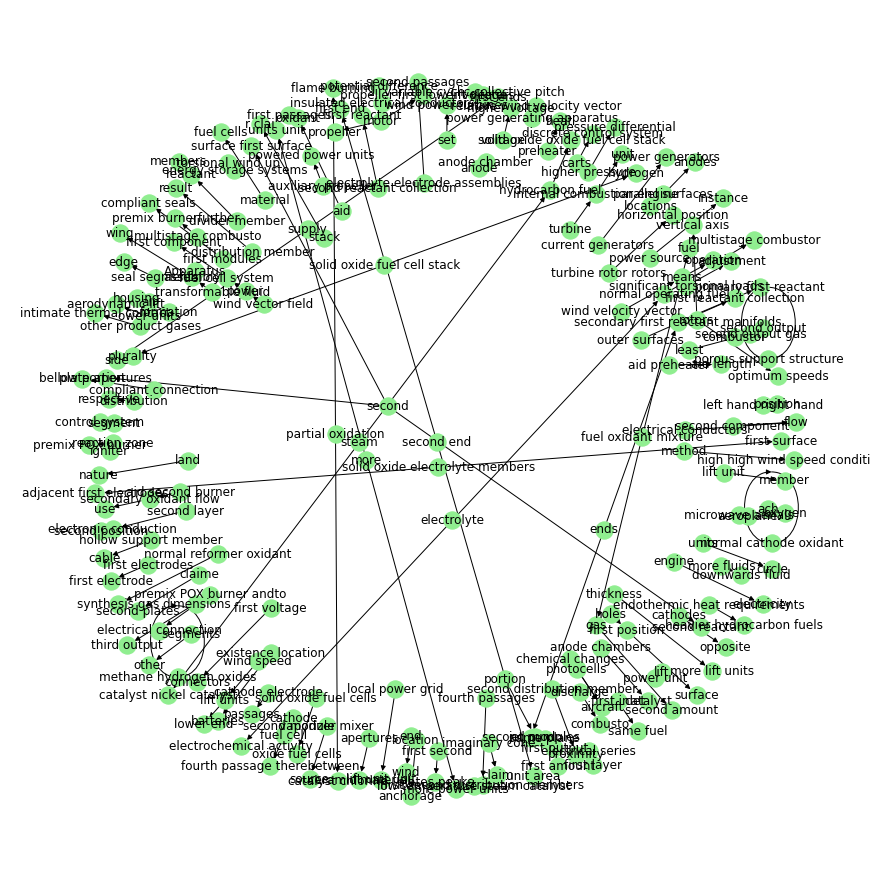

In [31]:
# Construction of Preliminary Knowledge Graph.

G=nx.from_pandas_edgelist(phrase_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='lightgreen', edge_cmap=plt.cm.Greens, pos = pos)
plt.show()